# About Dataset

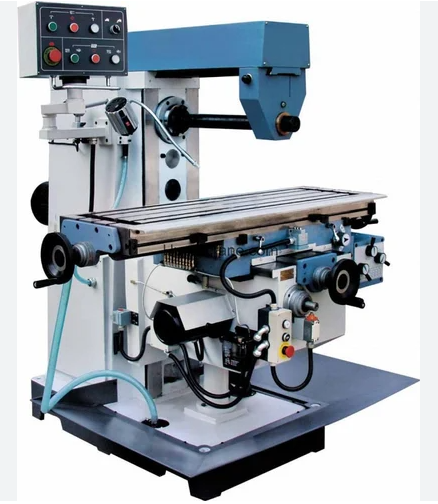

This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns
1.   UID: unique identifier ranging from 1 to 10000
2.   product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a
variant-specific serial number
3. type: just the product type L, M or H from column 2
4. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
5. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
6. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
7. torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes

1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.

This dataset is part of the following publication, please cite when using this dataset:

S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023.


**Acronyms:**
>[K]: kelvinblock
>[rpm]: revolutions per minute
>[Nm]: newton-meter
>[min]: minutes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

##**Importing Dataset**

In [3]:
#create a dataframe
df = pd.read_csv('/content/drive/MyDrive/Certificates For Master Resume IITM Placement/ai4i2020.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
num = list(df.columns[3:8])
cat = [df.columns[2]]
label_binary = [df.columns[8]]
label_multi = list(df.columns[9:])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## **Check Missing Value** ##

In [7]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

there are no missing values

##**Check Duplicated Data**##

In [8]:
df[df.duplicated(keep=False)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


In [9]:
df.duplicated().sum()

0

There are no duplicated data

##**Check Entry Errors**##

In [10]:
df_failures = df.loc[df[label_binary[0]] == 1]
df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1,0,0,0,0,0
2749,1,0,0,0,0,0
4044,1,0,0,0,0,0
4684,1,0,0,0,0,0
5536,1,0,0,0,0,0
5941,1,0,0,0,0,0
6478,1,0,0,0,0,0
8506,1,0,0,0,0,0
9015,1,0,0,0,0,0


In [11]:
df.drop(df_failures[(df_failures[label_multi] == 0).all(axis=1)][label_binary + label_multi].index, inplace = True)

In [12]:
df_nonfailures = df.loc[df[label_binary[0]] == 0]
df_nonfailures[(df_nonfailures[label_multi] != 0).any(axis=1)][label_binary + label_multi]

,Machine failure,TWF,HDF,PWF,OSF,RNF
1221,0,0,0,0,0,1
1302,0,0,0,0,0,1
1748,0,0,0,0,0,1
2072,0,0,0,0,0,1
2559,0,0,0,0,0,1
3065,0,0,0,0,0,1
3452,0,0,0,0,0,1
5471,0,0,0,0,0,1
5489,0,0,0,0,0,1
5495,0,0,0,0,0,1


In [13]:
nonfailures_index = df_nonfailures[(df_nonfailures[label_multi] != 0).any(axis=1)][label_binary].index
df.loc[nonfailures_index, label_binary] = df.loc[nonfailures_index, label_binary].replace(0, 1, inplace = False)

In [14]:
df.reset_index(drop = True, inplace = True)

In [15]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


##**Check Outliers**##

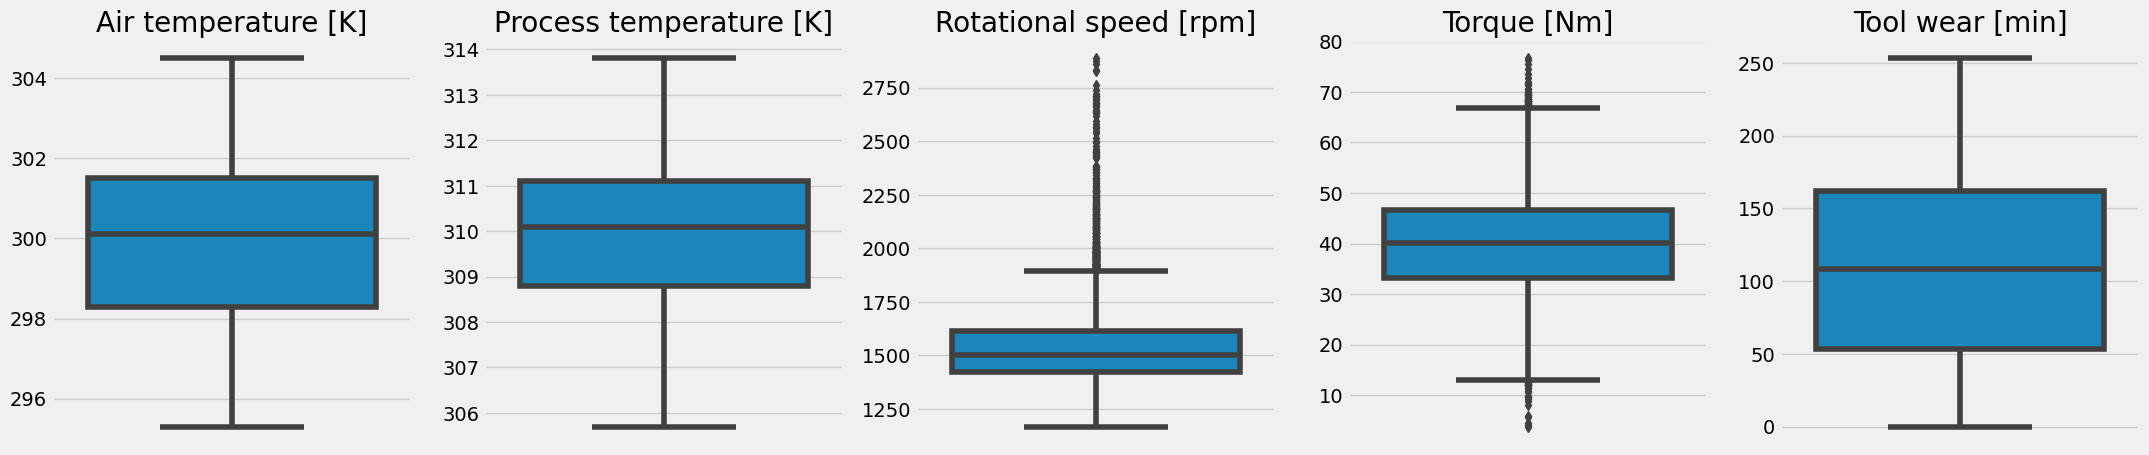

In [16]:
#outliers
plt.figure(figsize=(24,5))
for idx, feature in enumerate(num):
  plt.subplot(1,len(num),idx+1)
  sns.boxplot(data = df, y = feature).set(ylabel = None, title = feature)

##**Descriptive Statistics**

In [17]:
df_mean = pd.DataFrame()
for i in label_multi:
  class_mean = pd.DataFrame(round(df[df[i] == 1][num].mean(), 2)).T
  df_mean = pd.concat([df_mean,class_mean])
df_mean.index = label_multi

df_mean

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
TWF,300.30,310.17,1566.17,37.84,216.37
HDF,302.56,310.79,1337.26,53.17,107.19
PWF,300.08,309.95,1763.97,48.51,101.88
OSF,300.04,310.07,1350.33,58.37,207.69
RNF,300.82,310.76,1485.00,43.67,124.47


In [18]:
df.corr(numeric_only = True).iloc[7:, 1:6]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
TWF,0.009969,0.007325,0.010381,-0.014658,0.115849
HDF,0.137907,0.056962,-0.121288,0.142690,-0.001274
PWF,0.003486,-0.003344,0.123033,0.083833,-0.009325
OSF,0.002004,0.004567,-0.104616,0.183562,0.155972
RNF,0.017702,0.022290,-0.013098,0.016150,0.011336


##**Distribution**##

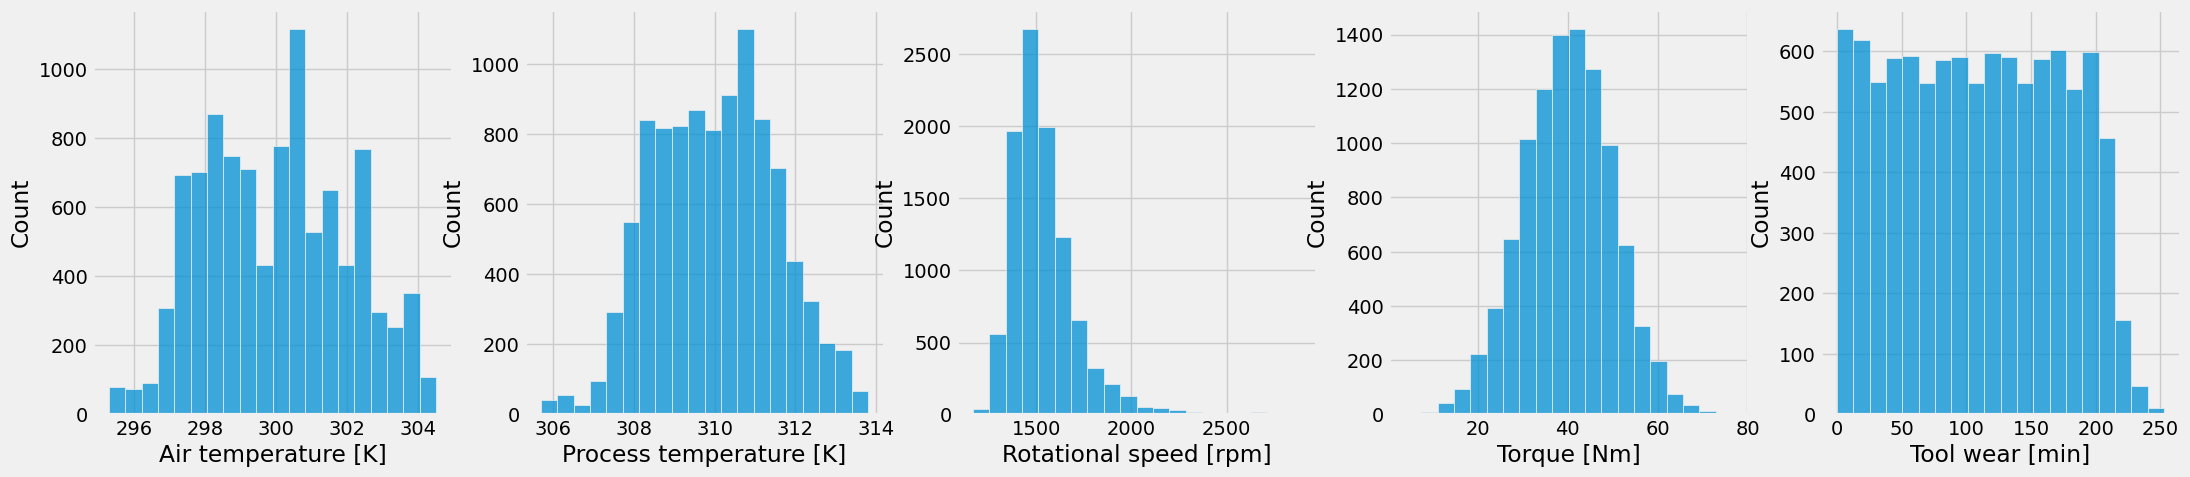

In [19]:
#dist: histogram
plt.figure(figsize=(24,5))
for idx, feature in enumerate(num):
  plt.subplot(1,len(num),idx+1)
  sns.histplot(data = df, x = feature, stat = 'count', bins = 20)

In [20]:
df[cat].value_counts().index

MultiIndex([('L',),
            ('M',),
            ('H',)],
           names=['Type'])

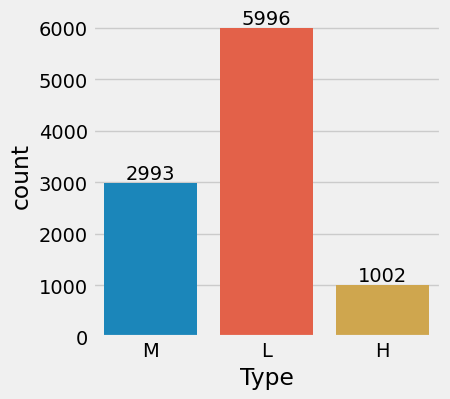

In [21]:
#dist: barplot
plt.figure(figsize=(4,4))
f = sns.countplot(data = df, x = cat[0])
f.bar_label(f.containers[0])
plt.show()

In [22]:
df[df['Machine failure']==1][label_multi].value_counts()

TWF  HDF  PWF  OSF  RNF
0    1    0    0    0      106
     0    1    0    0       80
          0    1    0       78
1    0    0    0    0       42
0    0    0    0    1       18
          1    1    0       11
     1    0    1    0        6
          1    0    0        3
1    0    0    1    0        2
               0    1        1
          1    1    0        1
dtype: int64

## **Correlation plot**

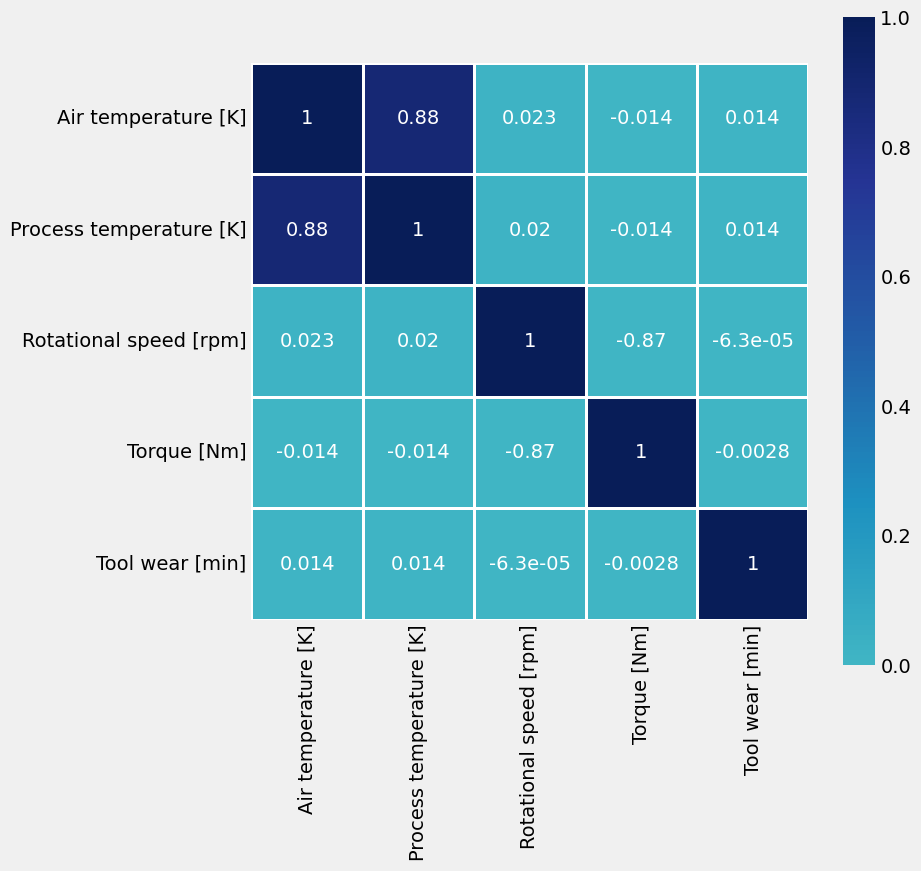

In [23]:
correlation = df[num].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)
plt.show()

## **Perform label categorical feature encoding**

In [24]:
#test
for i in (('L', 0), ('M', 1), ('H', 2)):
  df.Type =  df.Type.replace(*i)

In [25]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


##**Scaling Data**##

In [26]:
from sklearn.preprocessing import StandardScaler

#create a scaler object
scaler = StandardScaler()

#perform scaling on the numeric column
df[num] = scaler.fit_transform(df[num])

In [27]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0,0,0,0,0,0
1,2,L47181,0,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0,0,0,0,0,0
2,3,L47182,0,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0,0,0,0,0,0
3,4,L47183,0,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0,0,0,0,0,0
4,5,L47184,0,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0,0,0,0,0,0


## **Imbalances**

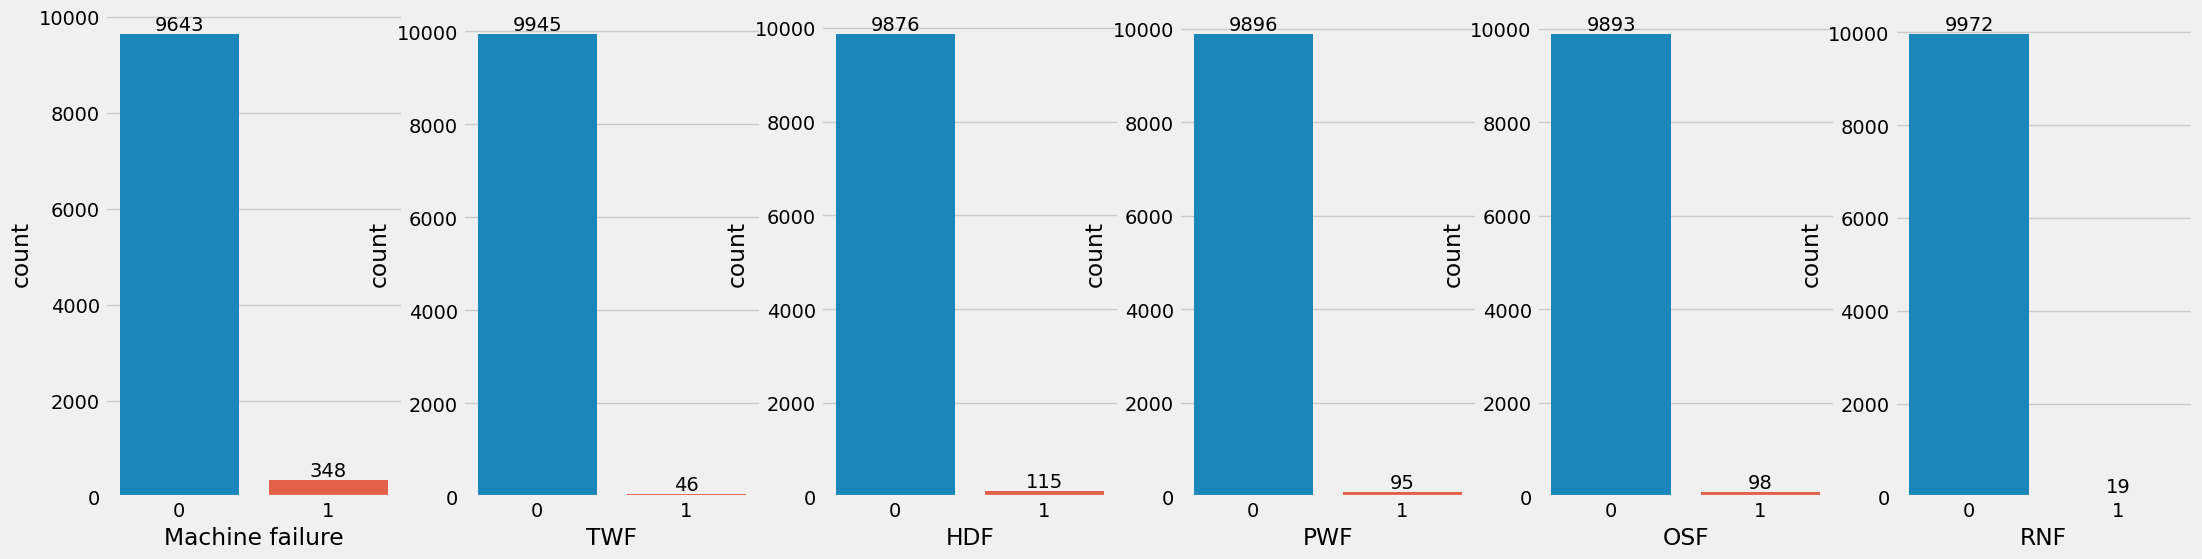

In [28]:
#specific failures
plt.figure(figsize=(24,6))
for idx, feature in enumerate(label_binary+label_multi):
  plt.subplot(1,6,idx+1)
  f = sns.countplot(data = df, x = feature)
  f.bar_label(f.containers[0])

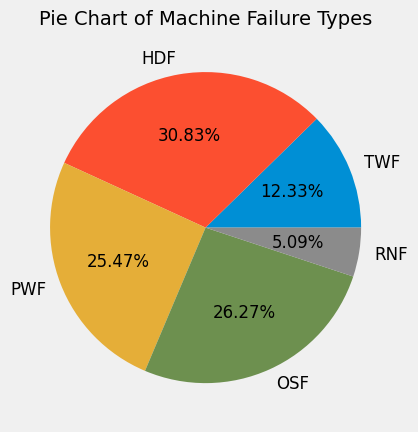

In [29]:
#With RNF
plt.pie(df.loc[df[label_binary[0]] == 1][label_multi].sum(), labels = df.loc[df[label_binary[0]] == 1][label_multi].sum().index,
        autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Pie Chart of Machine Failure Types', fontsize = 14)
plt.show()

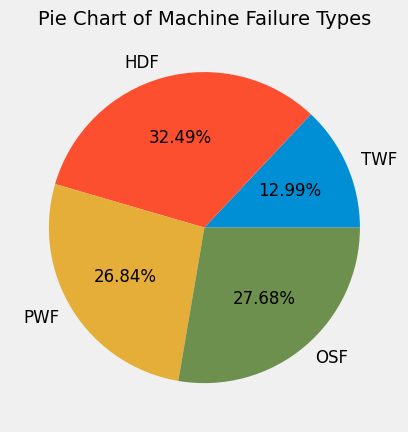

In [30]:
#without RNF
plt.pie(df.loc[df[label_binary[0]] == 1][label_multi[:4]].sum(), labels = df.loc[df[label_binary[0]] == 1][label_multi[:4]].sum().index,
        autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Pie Chart of Machine Failure Types', fontsize = 14)
plt.show()

## **Binary Classification**

In [31]:
df_clean = df[df.RNF != 1]

In [32]:
X_binary = df_clean[num+cat]
y_binary = df_clean[label_binary]

In [33]:
y_binary.value_counts()

Machine failure
0                  9643
1                   329
dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE, SVMSMOTE, RandomOverSampler
oversamp = RandomOverSampler(random_state=0)

In [35]:
over = SMOTE(random_state=15)

In [36]:
X_binary_over, y_binary_over = over.fit_resample(X_binary, y_binary)

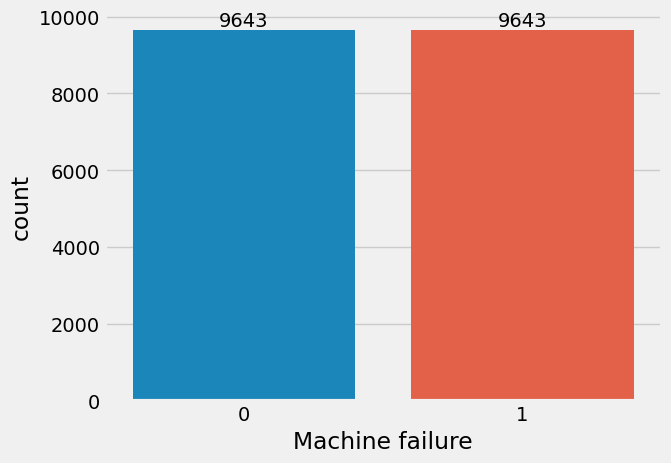

In [37]:
f = sns.countplot(data = y_binary_over, x = label_binary[0])
f.bar_label(f.containers[0])
plt.show()

In [38]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [39]:
#Dividing the dataset into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary_over, y_binary_over, test_size=0.2, random_state=100)

In [40]:
X_train.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
16331,0.375584,0.227278,-1.303240,3.257005,-0.867426,0
13221,-0.955753,-0.966114,-1.026297,1.388771,1.568401,0
2366,-0.352282,-1.014468,-0.723901,0.482982,-0.266170,0
17721,0.554871,0.445712,-0.235757,-0.224013,1.541986,0
12716,1.633117,1.045482,-1.126239,1.626089,1.208056,0


In [41]:
y_train.head(5)

,Machine failure
16331,1
13221,1
2366,0
17721,1
12716,1


In [42]:
# define models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Neural Network MLP': MLPClassifier(),
#     'SVM': SVC(probability=True)
# }

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [43]:
models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier()}

## Simple ML models and their metrics

In [44]:
# # Initialize lists to store results
# model_names = []
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# roc_auc_scores = []

# # Loop through each model in the dictionary
# for model_name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1]

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')

#     # Append results to respective lists
#     model_names.append(model_name)
#     accuracy_scores.append(accuracy)
#     precision_scores.append(precision)
#     recall_scores.append(recall)
#     f1_scores.append(f1)
#     roc_auc_scores.append(roc_auc)

# # Create a DataFrame to store the results
# results_df = pd.DataFrame({
#     'Model': model_names,
#     'Accuracy': accuracy_scores,
#     'Precision': precision_scores,
#     'Recall': recall_scores,
#     'F1 Score': f1_scores,
#     'ROC AUC': roc_auc_scores
# })


In [45]:
# Display the results
# results_df

## GridSearchCV technique is used

In [46]:
# define parameters
# params = {
#     'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'class_weight': ['balanced', None]},
#     'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
#     'Random Forest': {'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
#     'Gradient Boosting': {'learning_rate': [0.1, 1, 10], 'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
#     'Neural Network MLP': {'solver': ['adam', 'lbfgs'], 'alpha': [0.0001, 0.001]},
#     'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced', None]}
# }

params = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'class_weight': ['balanced', None]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
    'Random Forest': {'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]}
}

In [47]:
search1 = GridSearchCV(models['Logistic Regression'], params['Logistic Regression'], cv = 5)
search1.fit(X_train, y_train)

search2 = GridSearchCV(models['Decision Tree'], params['Decision Tree'], cv = 5)
search2.fit(X_train, y_train)

search3 = GridSearchCV(models['Random Forest'], params['Random Forest'], cv = 5)
search3.fit(X_train, y_train)

#search4 = GridSearchCV(models['Gradient Boosting'], params['Gradient Boosting'], cv = 5)
#search4.fit(X_train, y_train)

#search5 = GridSearchCV(models['SVM'], params['SVM'], cv = 5)
#search5.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [10, 20, 30]})

In [48]:
best_models = {}
result = pd.DataFrame(columns = ['Model', 'Score'])

best_models.update({'Logistic Regression': search1.best_estimator_})
result = result.append({'Model': 'Logistic Regression', 'Score': search1.best_score_},ignore_index = True)

best_models.update({'Decision Tree': search2.best_estimator_})
result = result.append({'Model': 'Decision Tree', 'Score': search2.best_score_},ignore_index = True)

best_models.update({'Random Forest': search3.best_estimator_})
result = result.append({'Model': 'Random Forest', 'Score': search3.best_score_},ignore_index = True)

#best_models.update({'Gradient Boosting': search4.best_estimator_})
#result = result.append({'Model': 'Gradient Boosting', 'Score': search4.best_score_},ignore_index = True)

#best_models.update({'SVM': search5.best_estimator_})
#result = result.append({'Model': 'SVM', 'Score': search5.best_score_},ignore_index = True)

result.sort_values('Score', ascending = False, inplace = True)
result.reset_index(drop = True, inplace = True)
result

,Model,Score
0,Random Forest,0.982240
1,Decision Tree,0.976861
2,Logistic Regression,0.836595


In [49]:
X_train.tail(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
16304,1.272359,0.547955,-0.983620,1.277846,0.221894,1
79,-0.602257,-0.744911,-0.762939,-0.209196,-1.664366,0
12119,0.498318,0.401245,-0.255208,-0.219285,1.540505,0
14147,-1.185139,-1.020583,-0.391819,1.914984,1.323740,1
5640,1.147568,1.007210,0.753970,-1.001690,-1.507265,1


In [50]:
y_train.tail(5)

,Machine failure
16304,1
79,0
12119,1
14147,1
5640,0


In [51]:
search1.predict([[-1.185139,-1.020583,-0.391819,1.914984,1.323740,1]])

array([1])

In [52]:
#search6 = GridSearchCV(models['Neural Network MLP'], params['Neural Network MLP'], cv = 5)
#search6.fit(X_train, y_train)

In [53]:
# best_models.update({'Neural Network MLP': search6.best_estimator_})
# result = result.append({'Model': 'Neural Network MLP', 'Score': search6.best_score_},ignore_index = True)

# result.sort_values('Score', ascending = False, inplace = True)
# result.reset_index(drop = True, inplace = True)
# result

In [54]:
# # define models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Neural Network MLP': MLPClassifier(),
#     'SVM': SVC(probability=True)
# }

# # define parameters
# params = {
#     'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'class_weight': ['balanced', None]},
#     'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
#     'Random Forest': {'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
#     'Gradient Boosting': {'learning_rate': [0.1, 1, 10], 'n_estimators': [10, 20, 30], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15]},
#     'Neural Network MLP': {'solver': ['adam', 'lbfgs'], 'alpha': [0.0001, 0.001]},
#     'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced', None]}
# }

# best_models = {}
# result = pd.DataFrame(columns = ['Model', 'Score'])

# for name, model in models.items():
#   search = GridSearchCV(model, params[name], cv = 5)
#   search.fit(X_train, y_train)
#   best_models.update({name: search.best_estimator_})
#   result = result.append({'Model': name, 'Score': search.best_score_},
#                            ignore_index = True)

# result.sort_values('Score', ascending = False, inplace = True)
# result.reset_index(drop = True, inplace = True)
# result

### As GridSearchCV takes lots of time, use RandomizedSearchCV

In [55]:
best_models[result['Model'][0]]

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=20)

In [56]:
index = pd.merge(X_binary, X_test, left_index=True, right_index=True).index

In [57]:
index

Int64Index([   1,    2,    3,    8,   21,   22,   23,   29,   30,   32,
            ...
            9930, 9933, 9939, 9945, 9952, 9958, 9967, 9976, 9979, 9982],
           dtype='int64', length=2041)

In [58]:
X_filtered_test = X_binary.filter(items = index, axis = 0)
X_filtered_test

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
1,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0
2,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0
3,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0
8,-0.852232,-0.879689,0.714932,-1.142132,-1.413005,1
21,-0.602257,-0.475354,-0.495249,0.482982,-0.706052,0
...,...,...,...,...,...,...
9958,-0.852232,-1.418803,0.391473,-0.760932,0.676434,1
9967,-0.702247,-1.216635,0.926853,-1.372858,1.084895,0
9976,-0.652252,-1.014468,0.185129,-0.439922,1.477647,2
9979,-0.552262,-0.947078,1.294926,-1.593553,1.650458,0


In [59]:
y_filtered_test = y_binary.filter(items = index, axis = 0)
y_filtered_test

,Machine failure
1,0
2,0
3,0
8,0
21,0
...,...
9958,0
9967,0
9976,0
9979,0


In [60]:
best_models[result['Model'][0]]

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=20)

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9929    0.9964      1975
           1     0.8250    1.0000    0.9041        66

    accuracy                         0.9931      2041
   macro avg     0.9125    0.9965    0.9503      2041
weighted avg     0.9943    0.9931    0.9935      2041

Confusion Matrix:


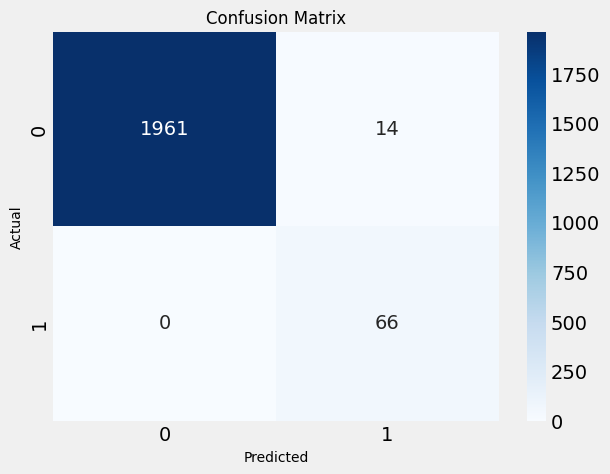

In [61]:
#with filter SMOTE
model = best_models[result['Model'][0]]
#model = SVC(C=10, class_weight='balanced', gamma=10, probability=True)
model.fit(X_train, y_train)

# Classification report
print('Classification Report:')
print(classification_report(y_filtered_test, model.predict(X_filtered_test), digits = 4))

# Confusion matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_filtered_test, model.predict(X_filtered_test))
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
plt.ylabel('Actual',fontsize=10)
plt.xlabel('Predicted',fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [62]:
def roc_analysis(model, X, y):
  y_pred_prob = model.predict_proba(X)[:,1]
  fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
  roc_auc = roc_auc_score(y, y_pred_prob)

  plt.plot(fpr, tpr, label=type(model).__name__+' (area = %0.5f)' % roc_auc, linewidth=1)

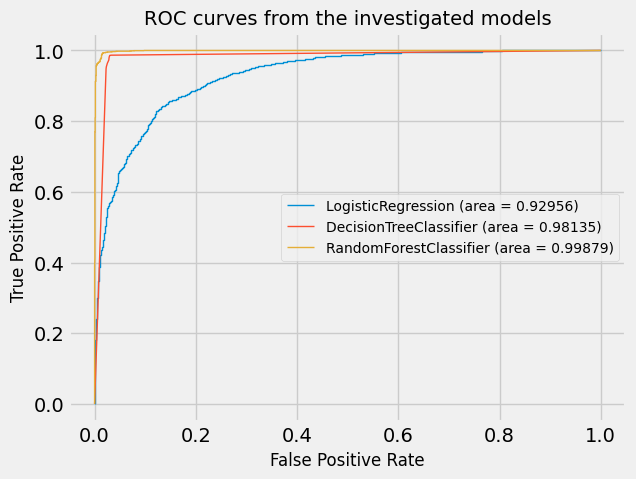

In [63]:
for name, model in best_models.items():
  roc_analysis(model, X_test, y_test)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curves from the investigated models', fontsize=14)
plt.legend(fontsize = 10, loc = 'right')
plt.show()

## **Multilabel Classification**

In [64]:
df_clean = df[df.RNF != 1]

In [65]:
df_clean.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,-0.952222,-0.947078,0.068015,0.282351,-1.695786,0,0,0,0,0,0
1,2,L47181,0,-0.902227,-0.879689,-0.729478,0.633456,-1.648656,0,0,0,0,0,0
2,3,L47182,0,-0.952222,-1.014468,-0.227559,0.944434,-1.617236,0,0,0,0,0,0
3,4,L47183,0,-0.902227,-0.947078,-0.590056,-0.048691,-1.585816,0,0,0,0,0,0
4,5,L47184,0,-0.902227,-0.879689,-0.729478,0.001467,-1.554395,0,0,0,0,0,0


In [66]:
df_failures = df_clean.loc[df_clean[label_binary[0]] == 1]

In [67]:
df_failures.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,0,-0.552262,-0.610132,7.373714,-3.549709,0.550753,1,0,0,1,0,0
69,70,L47249,0,-0.552262,-0.677521,-0.718324,2.579580,1.304836,1,0,0,1,1,0
77,78,L47257,0,-0.602257,-0.744911,-0.467365,0.131877,1.571907,1,1,0,0,0,0
160,161,L47340,0,-0.802237,-1.216635,-1.432163,2.078002,1.697588,1,0,0,0,1,0
161,162,L47341,0,-0.852232,-1.284025,-0.707170,1.235350,1.729008,1,0,0,0,1,0


In [68]:
print(f'num  :  {num}\n')
print(f'cat  :  {cat}\n')

num  :  ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

cat  :  ['Type']



In [69]:
label_multi

['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [70]:
X_multilabel = df_failures[num+cat]
y_multilabel = df_failures[label_multi[:4]]

In [71]:
X_multilabel.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
50,-0.552262,-0.610132,7.373714,-3.549709,0.550753,0
69,-0.552262,-0.677521,-0.718324,2.579580,1.304836,0
77,-0.602257,-0.744911,-0.467365,0.131877,1.571907,0
160,-0.802237,-1.216635,-1.432163,2.078002,1.697588,0
161,-0.852232,-1.284025,-0.707170,1.235350,1.729008,0


In [72]:
y_multilabel.head(5)

,TWF,HDF,PWF,OSF
50,0,0,1,0
69,0,0,1,1
77,1,0,0,0
160,0,0,0,1
161,0,0,0,1


In [73]:
y_multilabel.value_counts()

TWF  HDF  PWF  OSF
0    1    0    0      106
     0    1    0       80
          0    1       78
1    0    0    0       42
0    0    1    1       11
     1    0    1        6
          1    0        3
1    0    0    1        2
          1    1        1
dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multilabel, y_multilabel, test_size=0.2, random_state=100)

In [75]:
X_train.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
3682,0.997583,0.805042,-1.499086,2.539454,1.163446,0
3791,1.147568,0.602875,-0.891207,0.934403,-1.161644,0
5397,1.297553,1.546324,-0.472942,1.486139,2.278860,1
3234,0.397643,-0.407964,-1.097551,2.248538,0.079451,1
8838,-1.302187,-0.812300,-1.192358,2.248538,1.509067,1


In [76]:
X_test.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
4251,1.297553,0.670264,-1.421009,2.810306,0.095161,0
2425,-0.552262,-1.216635,-0.930245,2.368917,-1.224484,1
6147,0.497633,0.737653,-1.688699,2.449170,1.084895,0
6983,0.347648,0.737653,5.237773,-2.666930,0.974925,0
4402,1.197563,0.131150,-1.158897,0.553203,-0.863153,0


In [77]:
y_train.head(5)

,TWF,HDF,PWF,OSF
3682,0,0,0,1
3791,0,1,0,0
5397,1,0,0,1
3234,0,1,0,0
8838,1,0,0,1


In [78]:
y_test.head(5)

,TWF,HDF,PWF,OSF
4251,0,1,1,0
2425,0,0,1,0
6147,0,0,0,1
6983,0,0,1,0
4402,0,1,0,0


In [79]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00


In [80]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.pipeline import Pipeline

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [81]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skmultilearn.model_selection import IterativeStratification

In [82]:
# # define models
# base_models = {
#     'Logistic Regression': LogisticRegression(),
#     'SVM': SVC(probability=True),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Neural Network MLP': MLPClassifier()
# }

# result = pd.DataFrame(columns=['Model', 'Base Model', 'Score'])
# k_fold = IterativeStratification(n_splits=5, order=1)

# for base_name, base_model in base_models.items():
#   models = {
#       'Binary Relevance': BinaryRelevance(base_model),
#       'Classifier Chain': ClassifierChain(base_model),
#       'Label Powerset': LabelPowerset(base_model)
#   }
#   for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     score = cross_val_score(model, X_train, y_train, cv=k_fold).mean()
#     result = result.append({'Model': name, 'Base Model': base_name, 'Score': score},
#                            ignore_index = True)

# result.sort_values('Score', ascending = False).reset_index(drop = True)

In [83]:
# def eval(model, param_grid, X_train, y_train):
#   labels = list(y_train.columns.values)
#   grid_search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = k_fold)

#   grid_search.fit(X_train, y_train)
#   best_model = grid_search.best_estimator_
#   print('Best Parameters:', grid_search.best_params_)

#   y_pred = best_model.predict(X_test)

#   # Calculate accuracy
#   accuracy = grid_search.best_score_
#   print('Accuracy:', accuracy)

#   # Calculate Hamming Loss
#   hamming_loss_val = hamming_loss(y_test, y_pred)
#   print('Hamming Loss:', hamming_loss_val)

#   # Classification report
#   print('Classification Report:')
#   print(classification_report(y_test, y_pred, digits = 4))

#   #Confusion Matrix
#   cm = multilabel_confusion_matrix(y_test, y_pred)

#   plt.figure(figsize=(len(labels)*7,len(labels)))
#   for idx,i in enumerate(labels):
#     plt.subplot(1,len(labels),idx+1)
#     sns.heatmap(cm[idx], annot=True, cmap = 'Blues',
#                 xticklabels=['0', '1'], yticklabels=['0', '1'])
#     plt.ylabel('Actual',fontsize=10)
#     plt.xlabel('Predicted',fontsize=10)
#     plt.title('Confusion Matrix of '+i, fontsize=12)

In [84]:
# define models  ## REMOVING GRADIENT BOOSTING, SVM, NEURAL NETWORK MLP
base_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

result = pd.DataFrame(columns=['Model', 'Base Model', 'Score'])
k_fold = IterativeStratification(n_splits=5, order=1)

for base_name, base_model in base_models.items():
  models = {
      'Binary Relevance': BinaryRelevance(base_model),
      'Classifier Chain': ClassifierChain(base_model),
      'Label Powerset': LabelPowerset(base_model)
  }
  for name, model in models.items():
    model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv=k_fold).mean()
    result = result.append({'Model': name, 'Base Model': base_name, 'Score': score},
                           ignore_index = True)

result.sort_values('Score', ascending = False).reset_index(drop = True)

,Model,Base Model,Score
0,Label Powerset,Logistic Regression,0.896477
1,Label Powerset,Random Forest,0.877878
2,Classifier Chain,Logistic Regression,0.869735
3,Classifier Chain,Random Forest,0.869461
4,Binary Relevance,Logistic Regression,0.843718
5,Classifier Chain,Decision Tree,0.824984
6,Binary Relevance,Random Forest,0.820611
7,Binary Relevance,Decision Tree,0.802083
8,Label Powerset,Decision Tree,0.795831


In [85]:
def eval(model, param_grid, X_train, y_train):
    labels = list(y_train.columns.values)
    grid_search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = k_fold)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print('Best Parameters:', grid_search.best_params_)

    print('* '*40)
    print()
    print(f'dim of X_test: {X_test.shape}')
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = grid_search.best_score_
    print('Accuracy:', accuracy)

    # Calculate Hamming Loss
    hamming_loss_val = hamming_loss(y_test, y_pred)
    print('Hamming Loss:', hamming_loss_val)

    # Classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred, digits = 4))

    #Confusion Matrix
    cm = multilabel_confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(len(labels)*7,len(labels)))
    for idx,i in enumerate(labels):
        plt.subplot(1,len(labels),idx+1)
        sns.heatmap(cm[idx], annot=True, cmap = 'Blues',
                    xticklabels=['0', '1'], yticklabels=['0', '1'])
        plt.ylabel('Actual',fontsize=10)
        plt.xlabel('Predicted',fontsize=10)
        plt.title('Confusion Matrix of '+i, fontsize=12)

Best Parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

dim of X_test: (66, 6)
Accuracy: 0.9150610174139586
Hamming Loss: 0.01893939393939394
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     1.0000    0.9167    0.9565        24
           2     1.0000    0.8750    0.9333        24
           3     1.0000    1.0000    1.0000        16

   micro avg     1.0000    0.9315    0.9645        73
   macro avg     1.0000    0.9479    0.9725        73
weighted avg     1.0000    0.9315    0.9638        73
 samples avg     1.0000    0.9621    0.9747        73



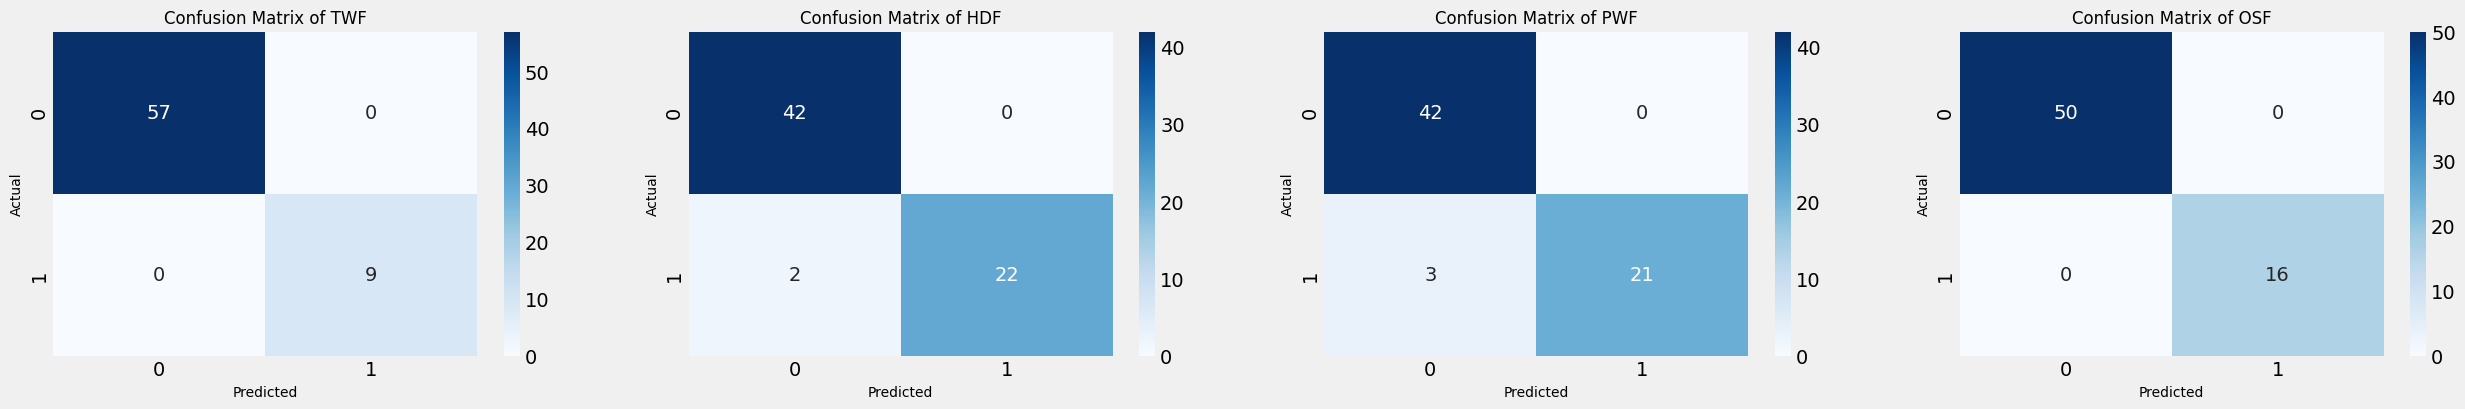

In [86]:
model = LabelPowerset(LogisticRegression())

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag'],
    'classifier__class_weight': ['balanced', None]
}

eval(model, param_grid, X_train, y_train)

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 20}
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

dim of X_test: (66, 6)
Accuracy: 0.896830794067198
Hamming Loss: 0.045454545454545456
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     0.9545    0.8750    0.9130        24
           2     0.9091    0.8333    0.8696        24
           3     1.0000    0.8750    0.9333        16

   micro avg     0.9552    0.8767    0.9143        73
   macro avg     0.9659    0.8958    0.9290        73
weighted avg     0.9552    0.8767    0.9139        73
 samples avg     0.9621    0.9167    0.9318        73



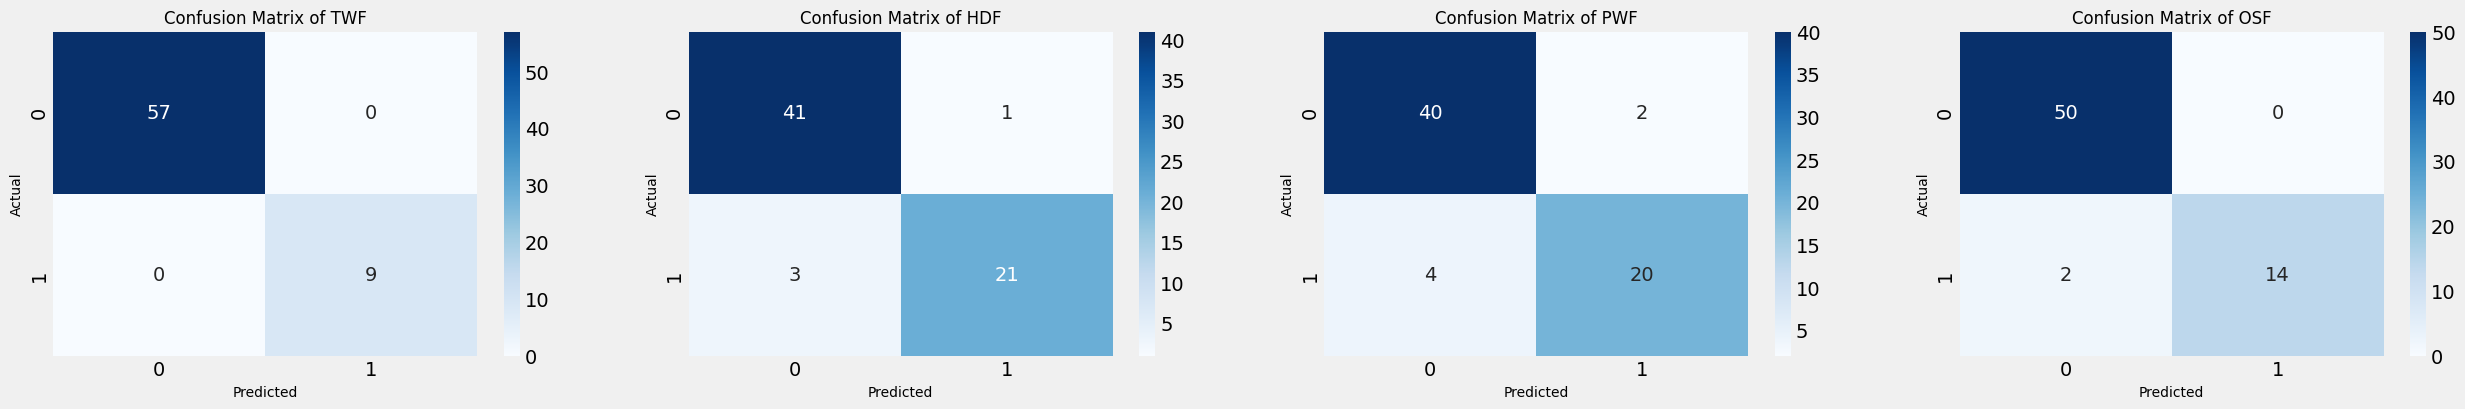

In [87]:
model = LabelPowerset(RandomForestClassifier())

param_grid = {
    'classifier__n_estimators': [20, 30, 40],
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_split': [5, 10, 15]
}

eval(model, param_grid, X_train, y_train)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 60}
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

dim of X_test: (66, 6)
Accuracy: 0.8929023270066555
Hamming Loss: 0.04924242424242424
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.7778    0.8750         9
           1     1.0000    0.9167    0.9565        24
           2     0.9048    0.7917    0.8444        24
           3     1.0000    0.8750    0.9333        16

   micro avg     0.9688    0.8493    0.9051        73
   macro avg     0.9762    0.8403    0.9023        73
weighted avg     0.9687    0.8493    0.9045        73
 samples avg     0.9394    0.8864    0.9040        73



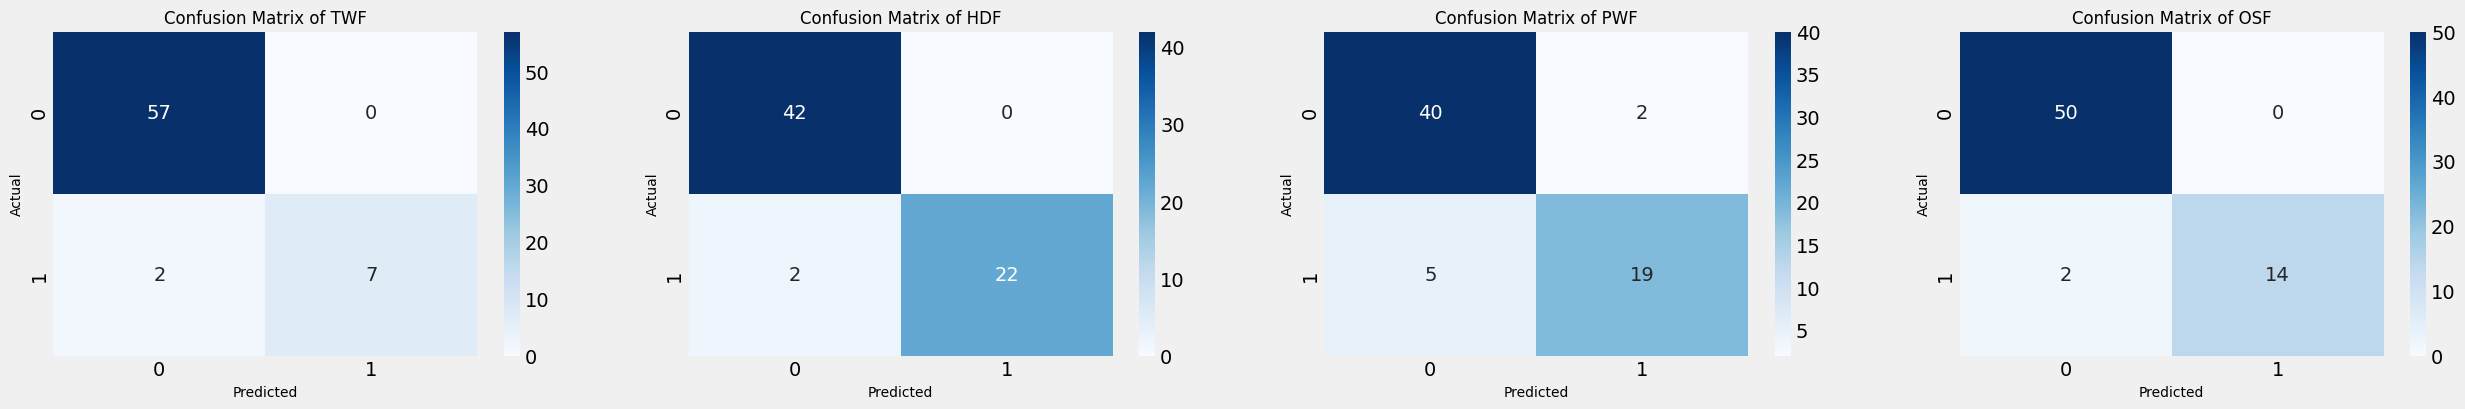

In [88]:
model = ClassifierChain(RandomForestClassifier())

param_grid = {
    'classifier__n_estimators': [30, 60, 120],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [10, 15, 20]
}

eval(model, param_grid, X_train, y_train)